In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
import json
import os

In [2]:
# Import the files per year
industry_top10 = '../Resources/Industry_Top10.csv'
industry_top10_women = '../Resources/Industry_Top10_women.csv'
industry_top10_df = pd.read_csv(industry_top10, low_memory=False)
industry_top10_women_df = pd.read_csv(industry_top10_women, low_memory=False)


In [3]:
industry_top10_df.head()

,North American Industry Classification,Fiscal Year,Industry Total Obligation/De-Obligation
0,PHARMACEUTICAL PREPARATION MANUFACTURING,2012,2.623340e+09
1,BIOLOGICAL PRODUCT (EXCEPT DIAGNOSTIC) MANUFAC...,2012,1.959078e+09
2,COMPUTER SYSTEMS DESIGN SERVICES,2012,1.675946e+09
3,ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEME...,2012,1.626938e+09
4,DIRECT HEALTH AND MEDICAL INSURANCE CARRIERS,2012,1.177810e+09


In [4]:
industry_top10_women_df.head()

,Women Owned Business,North American Industry Classification,Fiscal Year,Industry Total Obligation/De-Obligation,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,t,ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEME...,2012.0,2.301833e+08,NaN,ADM MGMT GM CONS,ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEME...
1,t,OTHER COMPUTER RELATED SERVICES,2012.0,1.576298e+08,NaN,OTH CPU SVC,OTHER COMPUTER RELATED SERVICES
2,t,"ALL OTHER PROFESSIONAL, SCIENTIFIC, AND TECHNI...",2012.0,1.292586e+08,NaN,OTH PST SVC,"ALL OTHER PROFESSIONAL, SCIENTIFIC, AND TECHNI..."
3,t,COMPUTER SYSTEMS DESIGN SERVICES,2012.0,1.231581e+08,NaN,CPU SYS DES,COMPUTER SYSTEMS DESIGN SERVICES
4,t,OTHER COMMUNICATIONS EQUIPMENT MANUFACTURING,2012.0,5.217248e+07,NaN,OTH COMM MFG,OTHER COMMUNICATIONS EQUIPMENT MANUFACTURING


In [5]:
# changing the scale to view the dollar amounts in smaller sizes
industry_top10_df["Industry Total Obligation/De-Obligation"] = industry_top10_df["Industry Total Obligation/De-Obligation"] / 1000000000
industry_top10_women_df["Industry Total Obligation/De-Obligation"] = industry_top10_women_df["Industry Total Obligation/De-Obligation"] / 1000000
industry_top10_df = industry_top10_df.rename(columns={"Industry Total Obligation/De-Obligation":"Industry Total Obligation (Billions)"})
industry_top10_women_df = industry_top10_women_df.rename(columns={"Industry Total Obligation/De-Obligation":"Industry Total Obligation (Millions)"})

In [6]:
# view the new changes
industry_top10_df.head()

,North American Industry Classification,Fiscal Year,Industry Total Obligation (Billions)
0,PHARMACEUTICAL PREPARATION MANUFACTURING,2012,2.623340
1,BIOLOGICAL PRODUCT (EXCEPT DIAGNOSTIC) MANUFAC...,2012,1.959078
2,COMPUTER SYSTEMS DESIGN SERVICES,2012,1.675946
3,ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEME...,2012,1.626938
4,DIRECT HEALTH AND MEDICAL INSURANCE CARRIERS,2012,1.177810


In [7]:
# view the unqiue values for NAICS
industry_top10_df["North American Industry Classification"].unique()

array(['PHARMACEUTICAL PREPARATION MANUFACTURING',
       'BIOLOGICAL PRODUCT (EXCEPT DIAGNOSTIC) MANUFACTURING',
       'COMPUTER SYSTEMS DESIGN SERVICES',
       'ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEMENT CONSULTING SERVICES',
       'DIRECT HEALTH AND MEDICAL INSURANCE CARRIERS',
       'OTHER COMPUTER RELATED SERVICES',
       'RESEARCH AND DEVELOPMENT IN THE PHYSICAL, ENGINEERING, AND LIFE SCIENCES (EXCEPT BIOTECHNOLOGY)',
       'RESEARCH AND DEVELOPMENT IN BIOTECHNOLOGY',
       'FACILITIES SUPPORT SERVICES',
       'ALL OTHER PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES',
       'OTHER MANAGEMENT CONSULTING SERVICES',
       'DATA PROCESSING, HOSTING, AND RELATED SERVICES',
       'MEDICINAL AND BOTANICAL MANUFACTURING',
       'TELEMARKETING BUREAUS AND OTHER CONTACT CENTERS',
       'RESEARCH AND DEVELOPMENT IN THE PHYSICAL, ENGINEERING, AND LIFE SCIENCES (EXCEPT NANOTECHNOLOGY AND BIOTECHNOLOGY)',
       'CUSTOM COMPUTER PROGRAMMING SERVICES'], dtype=object)

In [8]:
# view the new changes
industry_top10_women_df.head()

,Women Owned Business,North American Industry Classification,Fiscal Year,Industry Total Obligation (Millions),Unnamed: 4,Unnamed: 5,Unnamed: 6
0,t,ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEME...,2012.0,230.183337,NaN,ADM MGMT GM CONS,ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEME...
1,t,OTHER COMPUTER RELATED SERVICES,2012.0,157.629830,NaN,OTH CPU SVC,OTHER COMPUTER RELATED SERVICES
2,t,"ALL OTHER PROFESSIONAL, SCIENTIFIC, AND TECHNI...",2012.0,129.258586,NaN,OTH PST SVC,"ALL OTHER PROFESSIONAL, SCIENTIFIC, AND TECHNI..."
3,t,COMPUTER SYSTEMS DESIGN SERVICES,2012.0,123.158074,NaN,CPU SYS DES,COMPUTER SYSTEMS DESIGN SERVICES
4,t,OTHER COMMUNICATIONS EQUIPMENT MANUFACTURING,2012.0,52.172477,NaN,OTH COMM MFG,OTHER COMMUNICATIONS EQUIPMENT MANUFACTURING


In [9]:
# view the unique values for NAICS
industry_top10_women_df["North American Industry Classification"].unique()

array(['ADMINISTRATIVE MANAGEMENT AND GENERAL MANAGEMENT CONSULTING SERVICES',
       'OTHER COMPUTER RELATED SERVICES',
       'ALL OTHER PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES',
       'COMPUTER SYSTEMS DESIGN SERVICES',
       'OTHER COMMUNICATIONS EQUIPMENT MANUFACTURING',
       'RESEARCH AND DEVELOPMENT IN THE PHYSICAL, ENGINEERING, AND LIFE SCIENCES (EXCEPT BIOTECHNOLOGY)',
       'COMPUTER FACILITIES MANAGEMENT SERVICES',
       'CUSTOM COMPUTER PROGRAMMING SERVICES',
       'DATA PROCESSING, HOSTING, AND RELATED SERVICES',
       'ELECTRONIC COMPUTER MANUFACTURING', nan,
       'RESEARCH AND DEVELOPMENT IN THE SOCIAL SCIENCES AND HUMANITIES',
       'OTHER MANAGEMENT CONSULTING SERVICES', 'SOFTWARE PUBLISHERS',
       'RESEARCH AND DEVELOPMENT IN BIOTECHNOLOGY',
       'COMMERCIAL AND INSTITUTIONAL BUILDING CONSTRUCTION',
       'OTHER SCIENTIFIC AND TECHNICAL CONSULTING SERVICES',
       'EMERGENCY AND OTHER RELIEF SERVICES',
       'PHARMACEUTICAL PREPARATION MANUF

In [10]:
# assign values to each axis, set tick labels, and use iloc for the values for the overall 
# top 10 indsutry plotting (the women owned business will be separate)
fy12 = ["PPM","BIOPROMFG","CPU SYS DES","ADM MGMT GM CONS","DIR HEA/MED INS",
        "OTH CPU SVC","R&D PELS","R&D BIOTECH","FSS","OTH PST SVC"]
fy12_obligations = industry_top10_df.iloc[0:10,2]
fy12_x_axis = np.arange(len(fy12))
tick_locations_fy12 = fy12_x_axis


fy13 = ["PPM","CPU SYS DES","ADM MGMT GM CONS","DIR HEA/MED INS","R&D PELS",
        "R&D BIOTECH","OTH CPU SVC","R&D BIOTECH","FSS","OTH PST SVC"]
fy13_obligations = industry_top10_df.iloc[10:20,2]
fy13_x_axis = np.arange(len(fy13))
tick_locations_fy13 = fy13_x_axis

fy14 = ["PPM","CPU SYS DES","ADM MGMT GM CONS","DIR HEA/MED INS","OTH MGMT CONS",
        "OTH CPU SVC","R&D PELS","OTH PST SVC","R&D BIOTECH","BIOPROMFG"]
fy14_obligations = industry_top10_df.iloc[20:30,2]
fy14_x_axis = np.arange(len(fy14))
tick_locations_fy14 = fy14_x_axis

fy15 = ["CPU SYS DES","PPM","ADM MGMT GM CONS","DIR HEA/MED INS","OTH CPU SVC","OTH PST SVC",
        "R&D BIOTECH","R&D PELS","DATA SVC","FSS"]
fy15_obligations = industry_top10_df.iloc[30:40,2]
fy15_x_axis = np.arange(len(fy15))
tick_locations_fy15 = fy15_x_axis

fy16 = ["CPU SYS DES","ADM MGMT GM CONS","DIR HEA/MED INS","R&D BIOTECH","OTH PST SVC",
        "OTH CPU SVC","R&D PELS","FSS","DATA SVC","PPM"]
fy16_obligations = industry_top10_df.iloc[40:50,2]
fy16_x_axis = np.arange(len(fy16))
tick_locations_fy16 = fy16_x_axis

fy17 = ["CPU SYS DES","ADM MGMT GM CONS","DIR HEA/MED INS","OTH PST SVC","MED/BOTAN MFG",
        "R&D BIOTECH","OTH CPU SVC","FSS","PPM","BIOPROMFG"]
fy17_obligations = industry_top10_df.iloc[50:60,2]
fy17_x_axis = np.arange(len(fy17))
tick_locations_fy17 = fy17_x_axis

fy18 = ["CPU SYS DES","ADM MGMT GM CONS","OTH PST SVC","DIR HEA/MED INS","OTH CPU SVC","DATA SVC",
        "FSS","R&D BIOTECH","PPM","TELEMKT BUREAUS"]
fy18_obligations = industry_top10_df.iloc[60:70,2]
fy18_x_axis = np.arange(len(fy18))
tick_locations_fy18 = fy18_x_axis

fy19 = ["CPU SYS DES","ADM MGMT GM CONS","OTH PST SVC","OTH CPU SVC","DIR HEA/MED INS","R&D PELS (EXC NANO)",
        "R&D BIOTECH","PPM","DATA SVC","CUS CPU PROG"]
fy19_obligations = industry_top10_df.iloc[70:80,2]
fy19_x_axis = np.arange(len(fy19))
tick_locations_fy19 = fy19_x_axis

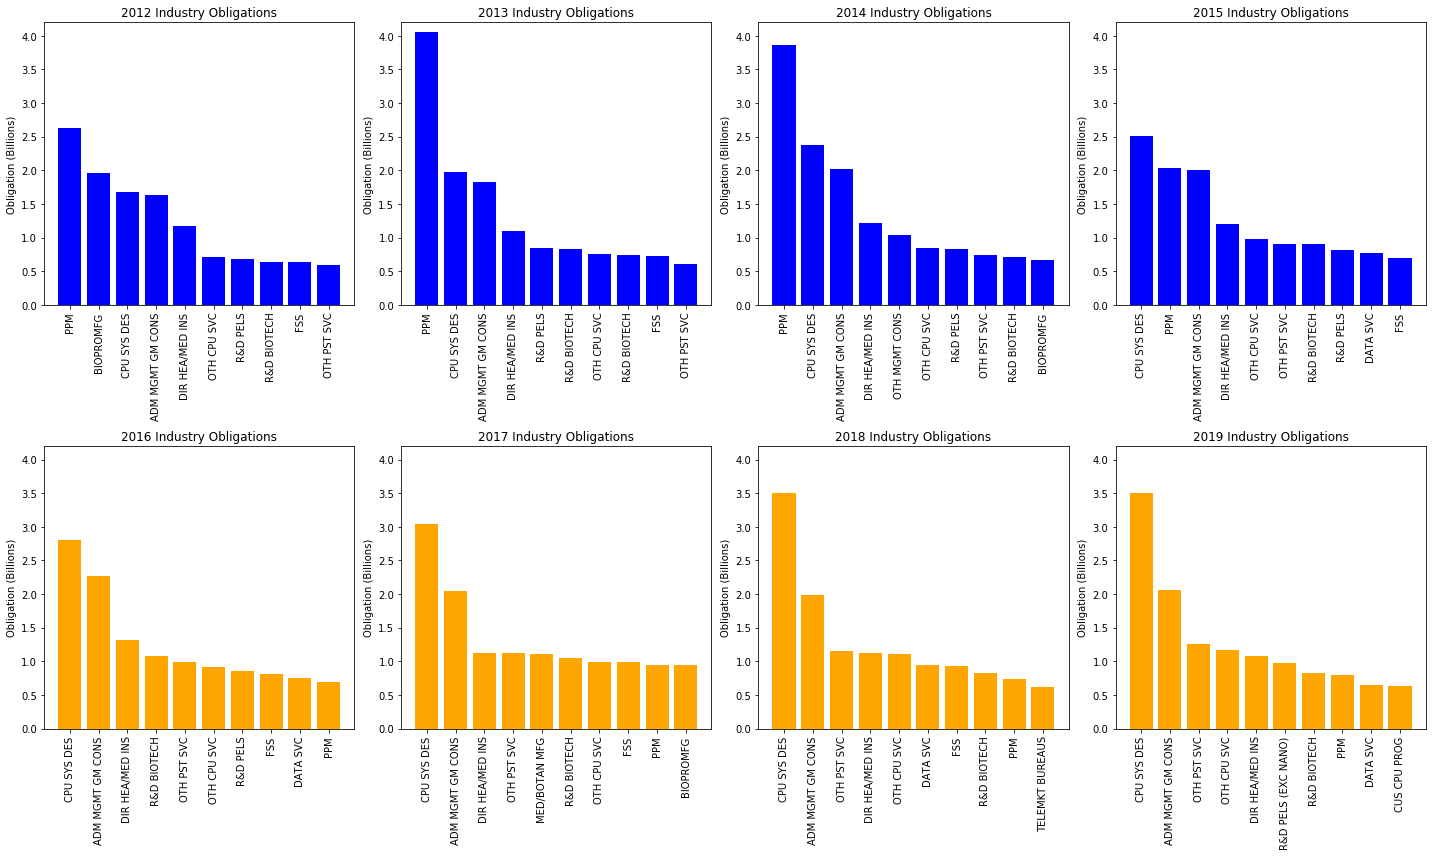

In [14]:
# plot the industry top 10 using a multiple subplot style, each subplot uses the labels, ticks, and values from previous cell
# The plots are arranged based on a row, column designation next to axis1[row,column], subplots 2X4
fig1, axs1 = plt.subplots(2, 4, figsize=(20,12))
axs1[0, 0].bar(fy12_x_axis, fy12_obligations, color="b", align="center")
axs1[0, 0].set_title('2012 Industry Obligations')
plt.sca(axs1[0,0])
plt.xticks(tick_locations_fy12,fy12,  rotation='vertical')

axs1[0, 1].bar(fy13_x_axis, fy13_obligations, color="b", align="center")
axs1[0, 1].set_title('2013 Industry Obligations')
plt.sca(axs1[0,1])
plt.xticks(tick_locations_fy13,fy13,  rotation='vertical')

axs1[0, 2].bar(fy14_x_axis, fy14_obligations, color="b", align="center")
axs1[0, 2].set_title('2014 Industry Obligations')
plt.sca(axs1[0,2])
plt.xticks(tick_locations_fy14,fy14,  rotation='vertical')

axs1[0, 3].bar(fy15_x_axis, fy15_obligations, color="b", align="center")
axs1[0, 3].set_title('2015 Industry Obligations')
plt.sca(axs1[0,3])
plt.xticks(tick_locations_fy15,fy15,  rotation='vertical')

axs1[1, 0].bar(fy16_x_axis, fy16_obligations, color="orange", align="center")
axs1[1, 0].set_title('2016 Industry Obligations')
plt.sca(axs1[1,0])
plt.xticks(tick_locations_fy16,fy16,  rotation='vertical')

axs1[1, 1].bar(fy17_x_axis, fy17_obligations, color="orange", align="center")
axs1[1, 1].set_title('2017 Industry Obligations')
plt.sca(axs1[1,1])
plt.xticks(tick_locations_fy17,fy17,  rotation='vertical')

axs1[1, 2].bar(fy18_x_axis, fy18_obligations, color="orange", align="center")
axs1[1, 2].set_title('2018 Industry Obligations')
plt.sca(axs1[1,2])
plt.xticks(tick_locations_fy18,fy18,  rotation='vertical')

axs1[1, 3].bar(fy19_x_axis, fy19_obligations, color="orange", align="center")
axs1[1, 3].set_title('2019 Industry Obligations')
plt.sca(axs1[1,3])
plt.xticks(tick_locations_fy19,fy19,  rotation='vertical')

# Add the ylabel to each subplot and set ylim to standardize
for ax in axs1.flat:
    ax.set(ylabel='Obligation (Billions)')
    ax.set_ylim([0, 4.2])
# Increase the spacing to suit viewing the titles
fig1.tight_layout(h_pad=1, w_pad=1)
plt.savefig("../Resources/Industry_Top10.png")

In [12]:
# assign values to each axis, set tick labels, and use iloc for the values for the women owned 
# top 10 indsutry plotting
wfy12 = ["ADM MGMT GM CONS","OTH CPU SVC","OTH PST SVC","CPU SYS DES","OTH COMM MFG","R&D PELS",
         "CPU FAC MGMT","CUS CPU PROG","DATA SVC","ELEC CPU MFG"]
wfy12_obligations = industry_top10_women_df.iloc[0:10,3]
wfy12_x_axis = np.arange(len(wfy12))
tick_locations_wfy12 = wfy12_x_axis


wfy13 = ["ADM MGMT GM CONS","OTH CPU SVC","CPU SYS DES","OTH PST SVC","R&D SOC Scie/Hum",
         "CUS CPU PROG","DATA SVC","ELEC CPU MFG","R&D PELS","OTH COMM MFG"]
wfy13_obligations = industry_top10_women_df.iloc[11:21,3]
wfy13_x_axis = np.arange(len(wfy13))
tick_locations_wfy13 = wfy13_x_axis

wfy14 = ["ADM MGMT GM CONS","CPU SYS DES","OTH CPU SVC","OTH PST SVC","OTH MGMT CONS","ELEC CPU MFG",
         "R&D PELS","SOFTWARE PUBS","OTH COMM MFG","R&D SOC Scie/Hum"]
wfy14_obligations = industry_top10_women_df.iloc[22:32,3]
wfy14_x_axis = np.arange(len(wfy14))
tick_locations_wfy14 = wfy14_x_axis

wfy15 = ["ADM MGMT GM CONS","CPU SYS DES","OTH CPU SVC","OTH PST SVC","R&D BIOTECH","R&D PELS",
         "SOFTWARE PUBS","COMM&INST BLDG","ELEC CPU MFG","OTH SCI/TECH CONS"]
wfy15_obligations = industry_top10_women_df.iloc[33:43,3]
wfy15_x_axis = np.arange(len(wfy15))
tick_locations_wfy15 = wfy15_x_axis

wfy16 = ["ADM MGMT GM CONS","CPU SYS DES","OTH CPU SVC","OTH PST SVC","EMER&OTH SVC","R&D PELS","COMM&INST BLDG",
         "OTH SCI/TECH CONS","SOFTWARE PUBS","PPM"]
wfy16_obligations = industry_top10_women_df.iloc[44:54,3]
wfy16_x_axis = np.arange(len(wfy16))
tick_locations_wfy16 = wfy16_x_axis

wfy17 = ["CPU SYS DES","ADM MGMT GM CONS","OTH CPU SVC","OTH PST SVC","EMER&OTH SVC","CUS CPU PROG","R&D PELS",
         "OTH SCI/TECH CONS","SOFTWARE PUBS","R&D SOC Scie/Hum"]
wfy17_obligations = industry_top10_women_df.iloc[55:65,3]
wfy17_x_axis = np.arange(len(wfy17))
tick_locations_wfy17 = wfy17_x_axis

wfy18 = ["CPU SYS DES","ADM MGMT GM CONS","OTH CPU SVC","OTH PST SVC","R&D PELS","CUS CPU PROG","SOFTWARE PUBS",
         "OTH SCI/TECH CONS","COMM&INST BLDG","TEMP HELP SVC"]
wfy18_obligations = industry_top10_women_df.iloc[67:77,3]
wfy18_x_axis = np.arange(len(wfy18))
tick_locations_wfy18 = wfy18_x_axis

wfy19 = ["CPU SYS DES","ADM MGMT GM CONS","OTH CPU SVC","OTH PST SVC","SOFTWARE PUBS","CUS CPU PROG",
         "EMER&OTH SVC","R&D PELS","TEMP HELP SVC","OTH MGMT CONS"]
wfy19_obligations = industry_top10_women_df.iloc[78:88,3]
wfy19_x_axis = np.arange(len(wfy19))
tick_locations_wfy19 = wfy19_x_axis

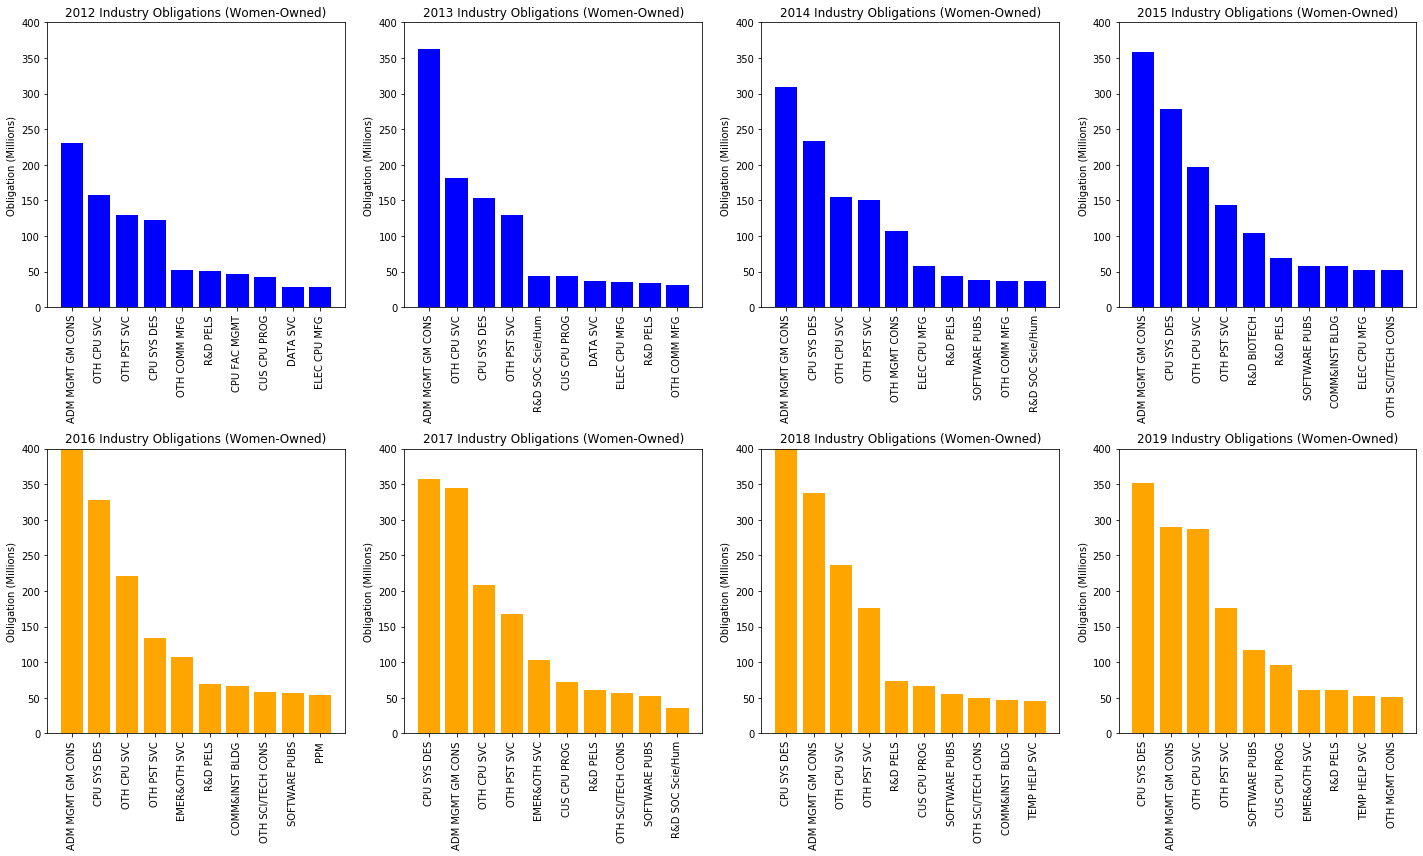

In [17]:
# plot the industry top 10 using a multiple subplot style, each subplot uses the labels, ticks, and values from previous cell
# The plots are arranged based on a row, column designation next to axis1[row,column], subplots 2X4
fig2, axs1 = plt.subplots(2, 4, figsize=(20,12))
axs1[0, 0].bar(wfy12_x_axis, wfy12_obligations, color="b", align="center")
axs1[0, 0].set_title('2012 Industry Obligations (Women-Owned)')
plt.sca(axs1[0,0])
plt.xticks(tick_locations_wfy12,wfy12,  rotation='vertical')

axs1[0, 1].bar(wfy13_x_axis, wfy13_obligations, color="b", align="center")
axs1[0, 1].set_title('2013 Industry Obligations (Women-Owned)')
plt.sca(axs1[0,1])
plt.xticks(tick_locations_wfy13,wfy13,  rotation='vertical')

axs1[0, 2].bar(wfy14_x_axis, wfy14_obligations, color="b", align="center")
axs1[0, 2].set_title('2014 Industry Obligations (Women-Owned)')
plt.sca(axs1[0,2])
plt.xticks(tick_locations_wfy14,wfy14,  rotation='vertical')

axs1[0, 3].bar(wfy15_x_axis, wfy15_obligations, color="b", align="center")
axs1[0, 3].set_title('2015 Industry Obligations (Women-Owned)')
plt.sca(axs1[0,3])
plt.xticks(tick_locations_wfy15,wfy15,  rotation='vertical')

axs1[1, 0].bar(wfy16_x_axis, wfy16_obligations, color="orange", align="center")
axs1[1, 0].set_title('2016 Industry Obligations (Women-Owned)')
plt.sca(axs1[1,0])
plt.xticks(tick_locations_wfy16,wfy16,  rotation='vertical')

axs1[1, 1].bar(wfy17_x_axis, wfy17_obligations, color="orange", align="center")
axs1[1, 1].set_title('2017 Industry Obligations (Women-Owned)')
plt.sca(axs1[1,1])
plt.xticks(tick_locations_wfy17,wfy17,  rotation='vertical')

axs1[1, 2].bar(wfy18_x_axis, wfy18_obligations, color="orange", align="center")
axs1[1, 2].set_title('2018 Industry Obligations (Women-Owned)')
plt.sca(axs1[1,2])
plt.xticks(tick_locations_wfy18,wfy18,  rotation='vertical')

axs1[1, 3].bar(wfy19_x_axis, wfy19_obligations, color="orange", align="center")
axs1[1, 3].set_title('2019 Industry Obligations (Women-Owned)')
plt.sca(axs1[1,3])
plt.xticks(tick_locations_wfy19,wfy19,  rotation='vertical')

# Add the ylabel to each subplot and set ylim to standardize
for ax in axs1.flat:
    ax.set(ylabel='Obligation (Millions)')
    ax.set_ylim([0, 400])
# Increase the spacing to suit viewing the titles
fig2.tight_layout(h_pad=1, w_pad=1)
plt.savefig("../Resources/Industry_Top10_women.png")